<a href="https://colab.research.google.com/github/VidyaValsalan/Prediction-with-DeepLearning/blob/master/LSTM-RL-Prediction/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 2599 bytes


In [5]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','loc1','loc2','loc3','loc4','loc5'])
df1.head(5)
a=input('enter the location')

enter the locationloc1


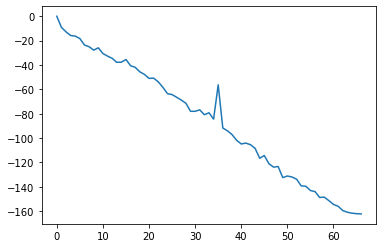

In [6]:
df1=df1.reset_index()[a]
df1.plot()


In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1000,batch_size=64,verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.4139 - val_loss: 0.0101
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3946 - val_loss: 0.0084
Epoch 3/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3753 - val_loss: 0.0069
Epoch 4/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3558 - val_loss: 0.0057
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3358 - val_loss: 0.0047
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3150 - val_loss: 0.0039
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2933 - val_loss: 0.0035
Epoch 8/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2706 - val_loss: 0.0036
Epoch 9/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2468 - val_loss: 0.0043
Epoch 10/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2218 - val_loss: 0.0058
Epoch 11/10

In [18]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

67.99802304982464

In [21]:
math.sqrt(mean_squared_error(ytest,test_predict))

142.68685432425548

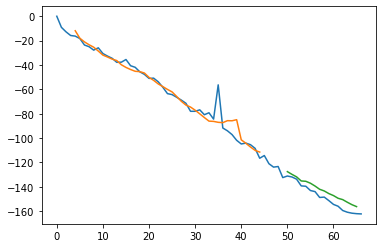

In [22]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
